In [1]:
import wrangle_jones

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# importing and cleaning data
df = wrangle_jones.wrangle_zillow(wrangle_jones.acquire_zillow())

NumExpr defaulting to 8 threads.


In [3]:
df.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age'],
      dtype='object')

In [4]:
outlier_cols = ['baths', 'beds', 'sqft', 'fullbaths', 'tax_value', 'logerror']

# Univariate Analysis
- Looking at the distributions of our variable

>#### Code for Outliers, Before and After Viz

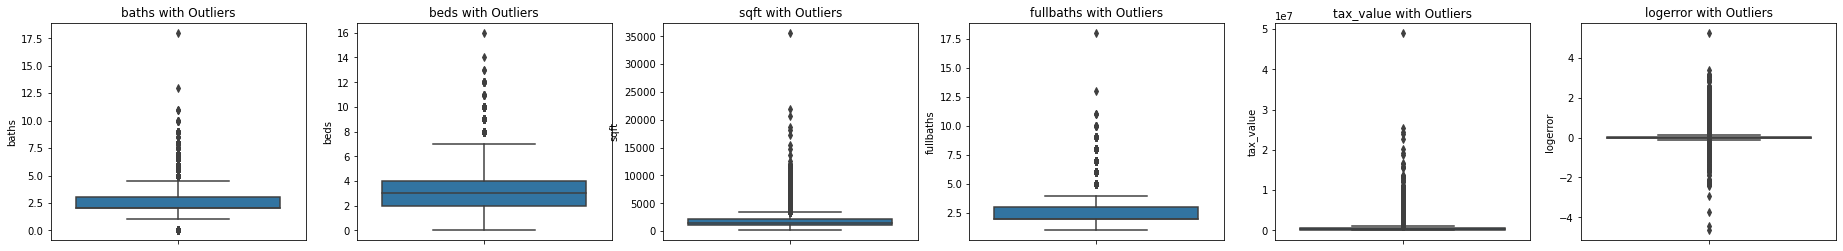

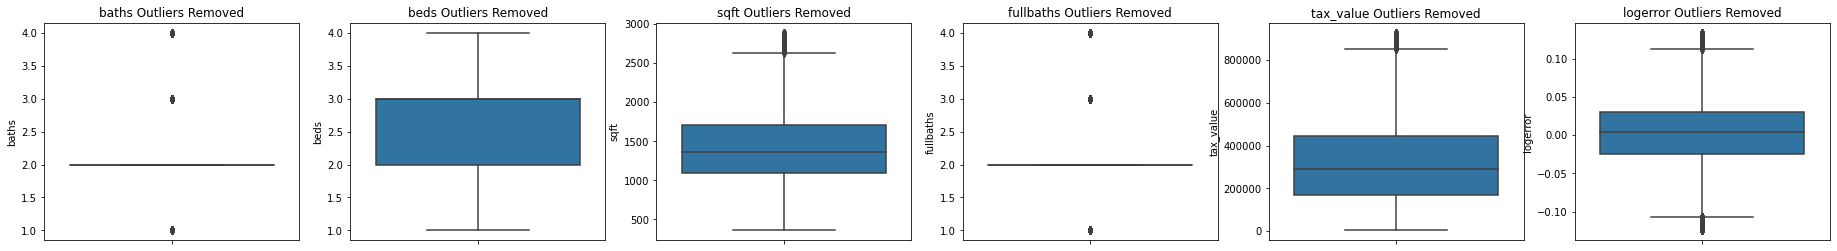

In [5]:
plt.figure(figsize = (32, 4))
    
# for loop that visualizes data with boxplots, before and after outliers removes
# 1st row of boxplots, shows data before outliers removed
for i, col in enumerate(outlier_cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplots
    plt.subplot(1, len(outlier_cols), plot_number)

    # Title with column name
    plt.title(f'{col} with Outliers')

    # Display boxplot for column
    sns.boxplot(data = wrangle_jones.acquire_zillow(), y = wrangle_jones.acquire_zillow()[col])

    # Hide gridlines.
    plt.grid(False)
    
# 2nd row of boxplots, shows data after outliers removed
plt.figure(figsize = (32, 4))
    
# for loop that cycles through list of columns where outliers will be removed  (uses cleaned df names)
for i, col in enumerate(outlier_cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(outlier_cols), plot_number)

    # Title with column name.
    plt.title(f'{col} Outliers Removed')

    # Display boxplot for column.
    sns.boxplot(data = df, y = df[col])
        
    # Hide gridlines.
    plt.grid(False)

#### testing `explore.py` function

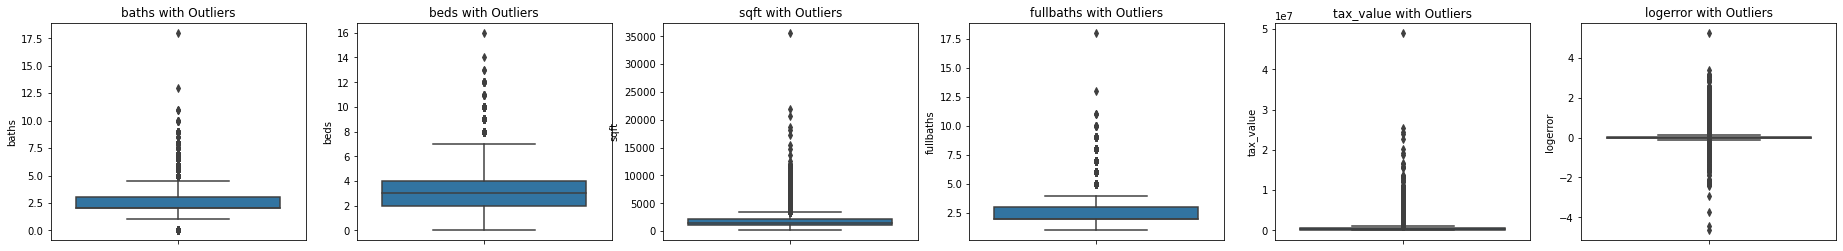

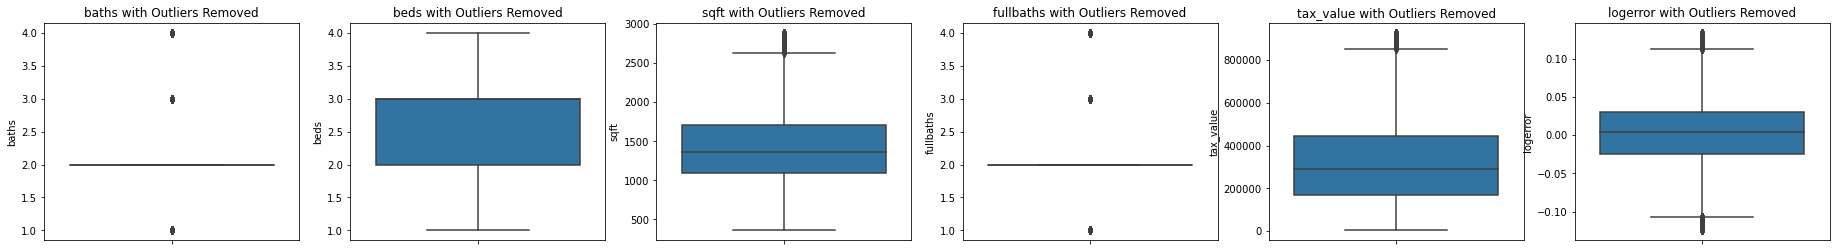

In [6]:
import explore_jones

explore_jones.visualize_outliers()

## Takeaways:
- We were able to remove a signficant amount of outliers from our data
- We can now actually visualize the IQR for `sqft`, `tax_value`, and `logerror`, where we could not before
- Interesting adjustment to the IQR for `baths` and `fullbaths`

In [7]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(f'{col.upper()}: {df[col].nunique()} Unique Values')
        print(df[col].value_counts())
        print()
        
    else:
        print(f'{col.upper()}: {df[col].nunique()} Unique Values')
        print()

BATHS: 4 Unique Values
2.0    17111
1.0     8217
3.0     7958
4.0      356
Name: baths, dtype: int64

BEDS: 4 Unique Values
3    15235
2    10482
4     6048
1     1877
Name: beds, dtype: int64

SQFT: 2338 Unique Values

FULLBATHS: 4 Unique Values
2    17111
1     8217
3     7958
4      356
Name: fullbaths, dtype: int64

LATITUDE: 27016 Unique Values

LONGITUDE: 25376 Unique Values

TAX_VALUE: 23093 Unique Values

LOGERROR: 33329 Unique Values

AGE: 127 Unique Values



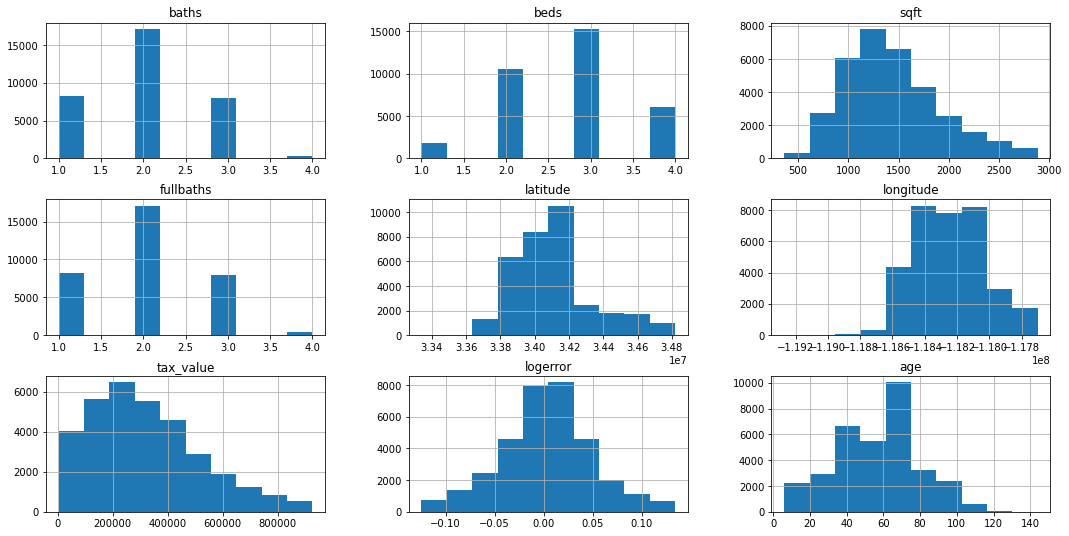

In [8]:
df.hist(figsize = (18, 9))
# plt.title('Distributions of Each Variable')
plt.show()

## Takeaways
- Our **target variable**, `logerror` is ~normally distrubuted. `longitude` is also somewhat normally distrubuted. 
- Slightly Right Skewed: `baths`, `fullbaths`, `sqft`, `latitude`, `tax_value`, and `age` 
- Slightly Left Skewed: `beds`

# Multivariate Exploration

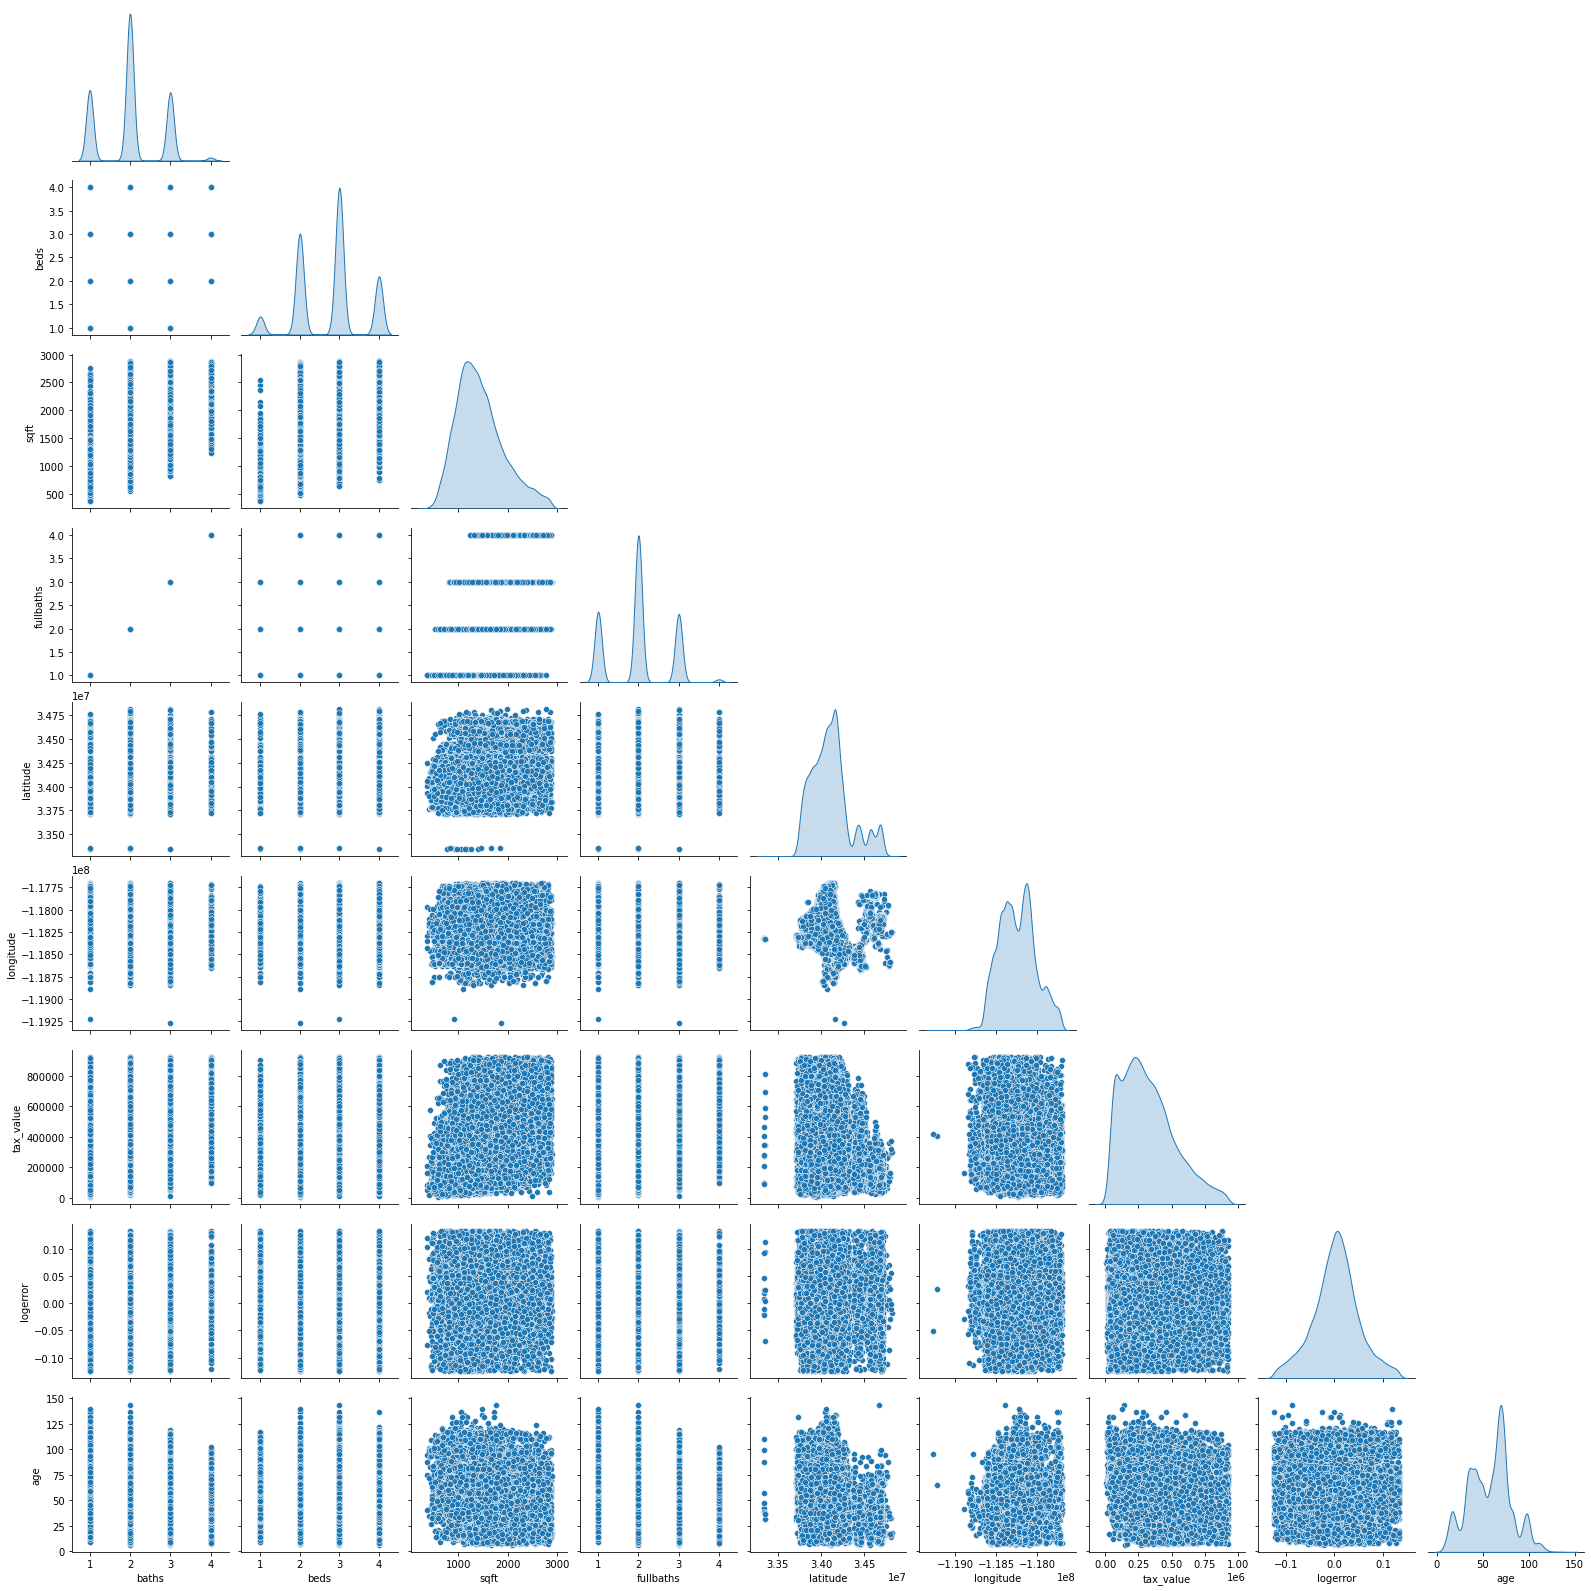

In [9]:
sns.pairplot(df, corner = True, diag_kind='kde')

### Takeaway
There is a really interesting shape when plotting `longitude` and `latitude`. I want to cluster with different variables, using `longitude` and `latitude` as the x and y and values. 

In [52]:
# splitting and scaling the data using the wrangle module for further analysis
train, validate, test = wrangle_jones.split_data(df)

In [42]:
train.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  
24277  20.0  
10231  66.0  
63485  58.0  
60254  50.0  
68284  36.0

In [53]:
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_jones.scale_data(train, validate, test, df)

/Users/stephanie/codeup-data-science/zillow-clustering-project/wrangle_jones.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scaled[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(test_scaled[cols_to_scale])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [44]:
train_scaled.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  baths_scaled  beds_scaled  sqft_scaled  fullbaths_scaled  \
24277  20.0     -0.024568    -0.939387    -1.419227         -0.024568   
10231  66.0     -0.024568     1.530082    -0.564908         -0.024568   
63485  58.0     -0.024568     0.295348    -0.696825         -0.024568   
60254  50.0     -0.024568     0.295348    -0.089589         -0.024568   
68284  36.0      1.352902    -0.939387    -0.807803          1.352902   

       tax_value_scaled  logerror_scaled  age_scaled  
24277          0.002470        -0.183790   -1.646064  
10231          0.132355        -0.310836    0.366355  
63485         -1.433744         0.126370    0.016369  
60254          0.477454        -0.850465   -0.333617  
68284         -0.950127        -0.863638   -0.946093

In [45]:
train.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  
24277  20.0  
10231  66.0  
63485  58.0  
60254  50.0  
68284  36.0

>#### Just realized the scaling function returns a df with both scaled and unscaled data, may not need to split scaling and splitting functions and be able to model and cluster using scale

# Looking at some clusters

>### Are there any interesting patterns between `latitude` and `longitude` that I can cluster on?

In [15]:
pd.DataFrame(train.columns)

0
0      baths
1       beds
2       sqft
3  fullbaths
4   latitude
5  longitude
6  tax_value
7   logerror
8        age

>## Need to add to this description but master, heavy duty lifting cluster function, creates n-1 k columns to see cluster predictions for multiple k values in one df

In [54]:
# cluster function that I created in clustering exercises
def cluster_predictions(df, X, min_range, max_range, step, original_cols):
    '''
THIS FUNCTION TAKES IN A FULL DF, A DF OF FEATURES TO MODEL, A MIN K VALUE, AND MAX K VALUE, AND RETURNS 
A DF WITH K MEANS MODEL PREDICTIONS COLUMNS FOR THE K VALUE RANGE FROM MIN TO MAX - 1. 
    '''
    
    for n in range(min_range, max_range, step):
        # creating model object
        kmeans = KMeans(n_clusters = n)

        # fitting data to model 
        kmeans.fit(X)

        # using the. model to make predictions
        kmeans.predict(X)

        # adding predictions columns to original df and recasting dtype to object for visualizations
        df[f'{n}_clusters'] = kmeans.predict(X).astype('object')
        
    # making values in cluster predictions columns strings for visualizations (do not want ordinal)
    for col in df.columns:
        if col not in original_cols:
            df[col] = 'cluster_' + df[col].astype(str)
            
    

    return df

### First I will create clusters for lat/long
> I want to see if there are any unique geographic groupings in the data

> I will start clustering on the unscaled lat/long, but may come back later, time permitting to see clustering on the unscaled data. I am not sure if this matters, since the data is geographic in nature and unscaled data more accurately reflects the location.

In [17]:
train.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age'],
      dtype='object')

In [33]:
train_scaled.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled'],
      dtype='object')

# Master cluster function :) /\ columns above to choose from

In [55]:
cluster_df_geo = cluster_predictions(train_scaled, train_scaled[['tax_value', 'age_scaled']], 2, 6, 1, train_scaled.columns)

In [56]:
cluster_df_geo.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  baths_scaled  beds_scaled  sqft_scaled  fullbaths_scaled  \
24277  20.0     -0.024568    -0.939387    -1.419227         -0.024568   
10231  66.0     -0.024568     1.530082    -0.564908         -0.024568   
63485  58.0     -0.024568     0.295348    -0.696825         -0.024568   
60254  50.0     -0.024568     0.295348    -0.089589         -0.024568   
68284  36.0      1.352902    -0.939387    -0.807803          1.352902   

       tax_value_scaled  logerror_scaled  age_scaled 2_clusters 3_clusters  \
24277          0.002470        -0.183790   -1.646064  cluster_0  cluster_2   
10231          0.132355        -0.310836    0.366355  cluster_0  cluster_2   
63485         -1.433744         0.126370    0.016369  cluster_0  cluster_1   
60254          0.477454        -0.850465   -0.333617  cluster_1  cluster_2   
68284         -0.950127        -0.863638   -0.946093  cluster_0  cluster_1   

      4_clusters 5_clusters  
24277  cluster_0  cluster_2  
10231  cluster_0  cluster_2  
63485  cluster_2  cluster_3  
60254  cluster_1  cluster_2  
68284  cluster_2  cluster_3

In [49]:
cluster_df_geo.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled', '2_clusters', '3_clusters',
       '4_clusters', '5_clusters'],
      dtype='object')

In [57]:
# my visualize clusters function from modeling exercises module
def visualize_clusters(cluster_df, x, y):
    '''
 THIS FUNCTION TAKES IN A DATAFRAME OF ORIGINAL DATA ALONG WITH EACH N_CLUSTERS MODEL PREDICTION COLUMN AND PLOTS
 A SCATTERPLOT FOR EACH N_CLUSTERS COLUMN, WITH EACH CLUSTER IN A DIFFERENT COLOR. 
    '''
    
    for col in cluster_df.columns:
        
        if col not in ['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled']:
            
            # this step is already in the cluster creation function but can put it back here if decide to 
                # clean up and take it out of that one
            #pred_df[col] = 'cluster_' + cluster_df[col].astype(str)

            sns.relplot(data = cluster_df, x = x, y = y, hue = col)

            plt.title(f'{col}')

            plt.show()

            print()

In [38]:
df.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age'],
      dtype='object')

>### Time permitting I want to go back and fix this so that the train_scaled does not include the cluster predictions columns. I only want these columns in the clusters_df

Everytime I want to visualize different k ranges I have to restart the whole notebook or rerun the code to give me a clean train and scaled_train df

In [39]:
train_scaled.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled', '2_clusters', '3_clusters',
       '4_clusters', '5_clusters'],
      dtype='object')

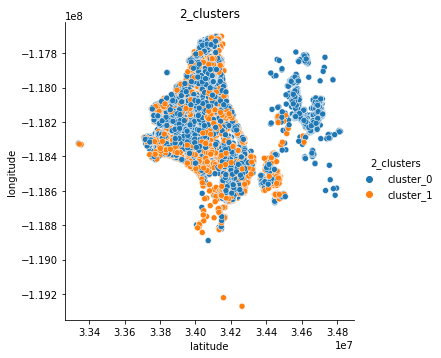

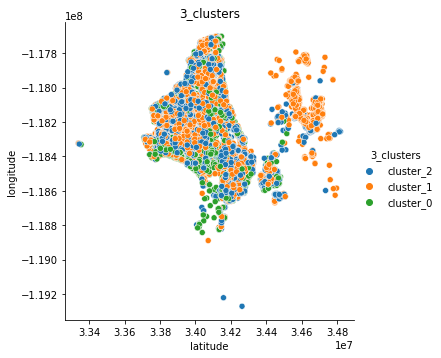

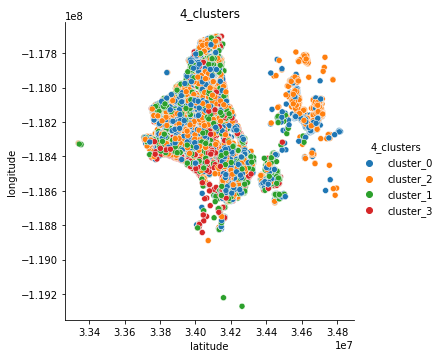

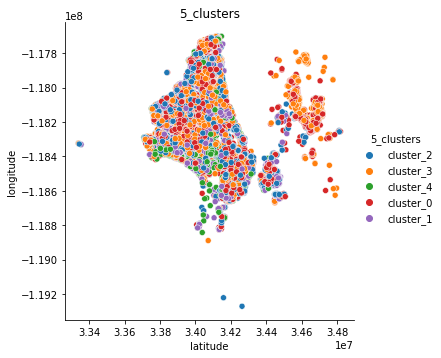

In [58]:
visualize_clusters(cluster_df_geo, 'latitude', 'longitude')

## If we plot lat against long, we get a geographic scatterplot representation of our data

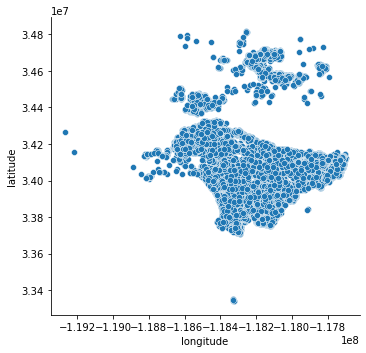

In [61]:
sns.relplot(data = train_scaled, x = 'longitude', y = 'latitude')

>### Is there any correlation between the log error and where a property is located?

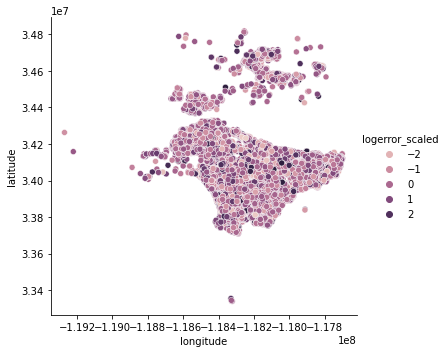

In [69]:
sns.relplot(data = train_scaled, x = 'longitude', y = 'latitude', hue = 'logerror_scaled')

>### ...log error and size (sqft) by location

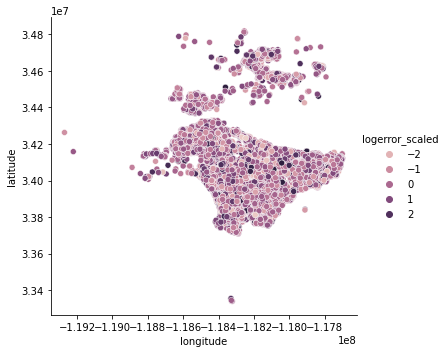

In [71]:
sns.relplot(data = train_scaled, x = 'longitude', y = 'latitude', hue = 'logerror_scaled')

># Takeaway from looking at geo mapped viz's
- These are really cool and helpful to see the actual geographic representation
- Not finding any clear patterns in the data, though :(
    - ***Note: I was clustering using the unscaled data! If I come back to this will make sure to cluster with scaled data. If I have to rerun the notebook again (which I am sure I will, I will add _scaled to the columns in the cluster function!)
- I will come back to this if I have time and explore more, but for now I will trying clustering with lat/long (instead of plotting them) and look at other variables plotted against one another

### ! Code to reset and try new clusters and variables to plot clusters on 

/Users/stephanie/codeup-data-science/zillow-clustering-project/wrangle_jones.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scaled[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(test_scaled[cols_to_scale])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


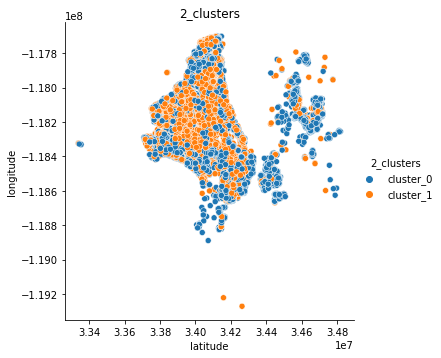

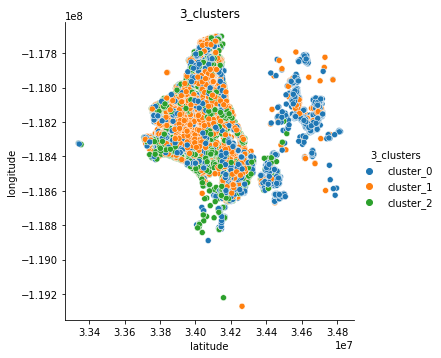

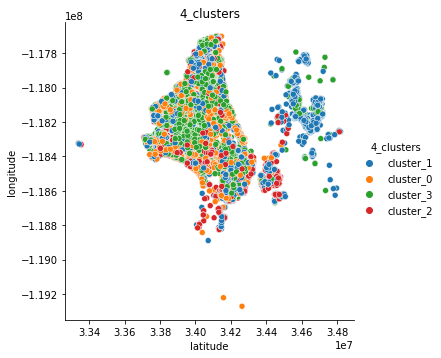

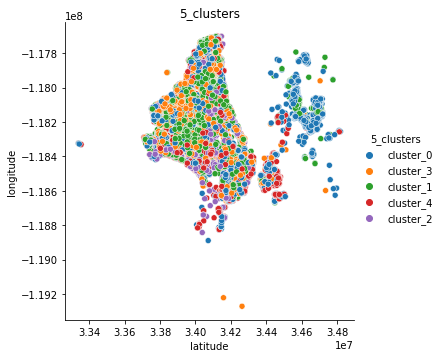

In [72]:
train, validate, test = wrangle_jones.split_data(df)

train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_jones.scale_data(train, validate, test, df)

cluster_df_geo = cluster_predictions(train_scaled, train_scaled[['age_scaled', 'tax_value_scaled']], 2, 6, 1, train_scaled.columns)

visualize_clusters(cluster_df_geo, 'latitude', 'longitude')

>## Peak Under the Hood and See How the Clusters are Splitting the Data Points

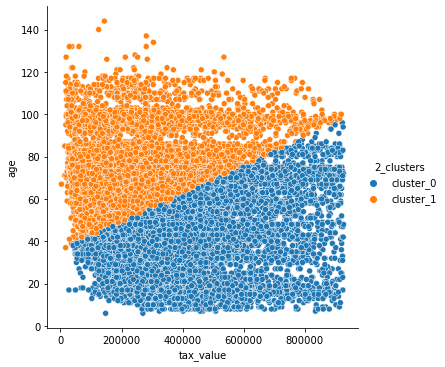

In [101]:
sns.relplot(data = cluster_df_geo, x = 'tax_value', y = 'age', hue = '2_clusters')

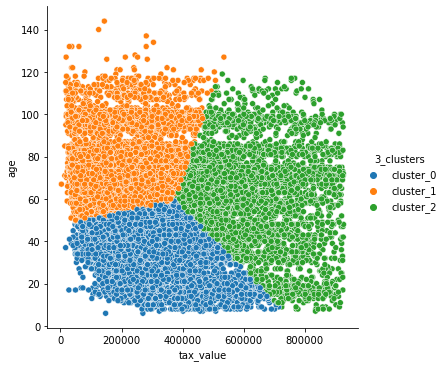

In [102]:
sns.relplot(data = cluster_df_geo, x = 'tax_value', y = 'age', hue = '3_clusters')

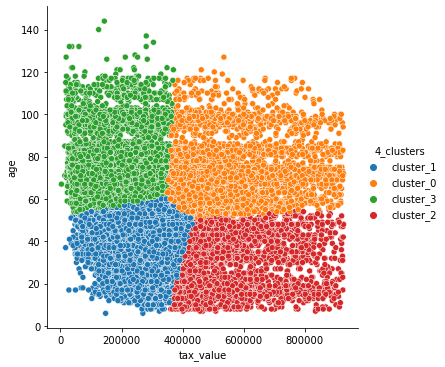

In [103]:
sns.relplot(data = cluster_df_geo, x = 'tax_value', y = 'age', hue = '4_clusters')

### I like how k = 4 clusters, gives 4 quadrants
- `cluster_3` green: *old, inexpensive* 
- `cluster_0` orange: *old, expensive*
- `cluster_1` blue: *newer, inexpensive*
- `cluster_2` red: *newer, expensive*

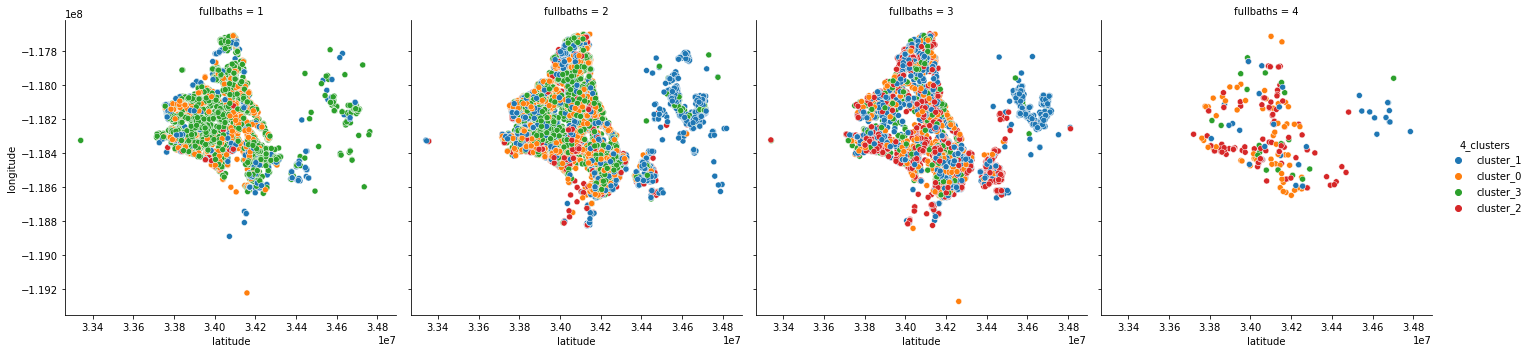

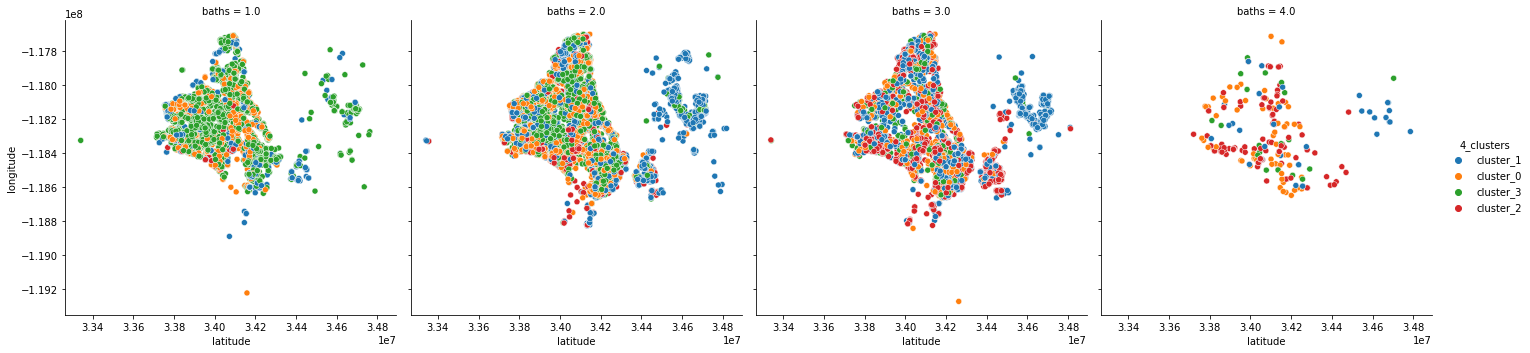

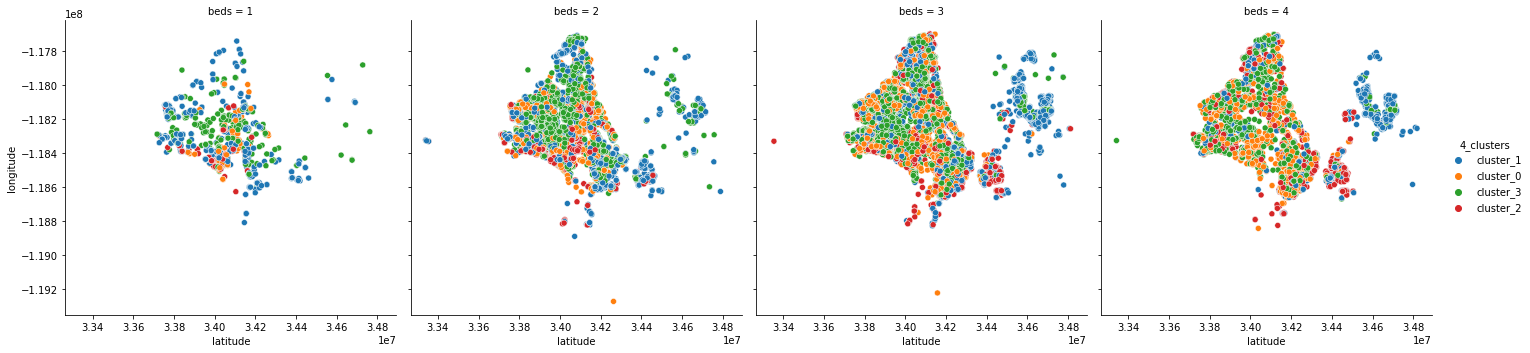

In [108]:
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '4_clusters', col = 'fullbaths')
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '4_clusters', col = 'baths')
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '4_clusters', col = 'beds')


# I would naturally expect older homes to be less expensive and newer homes to be more expensive. I would like to see at properties that go against this assumption and see if there are any interesting patterns or insights...

>## What makes an older home more expensive?

- filtering df so only looking at `cluster_0` orange: *old, expensive* and will explore that data

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


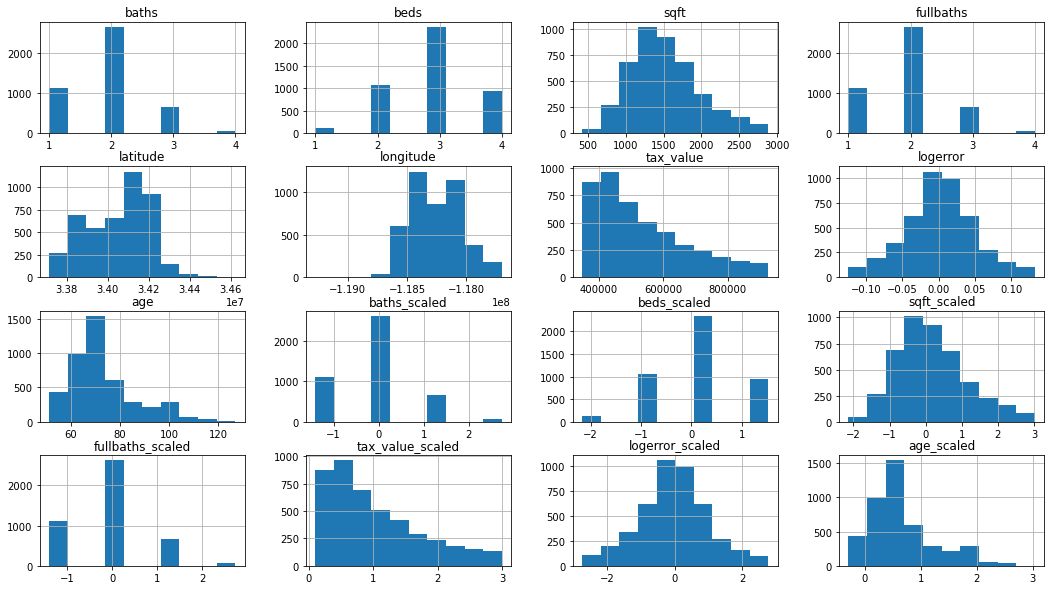

In [121]:
cluster_zero_df = cluster_df_geo[cluster_df_geo['4_clusters'] == 'cluster_0']
cluster_zero_df.drop(columns = ['2_clusters', '3_clusters', '5_clusters'], inplace = True)
cluster_zero_df.hist(figsize = (18, 10));

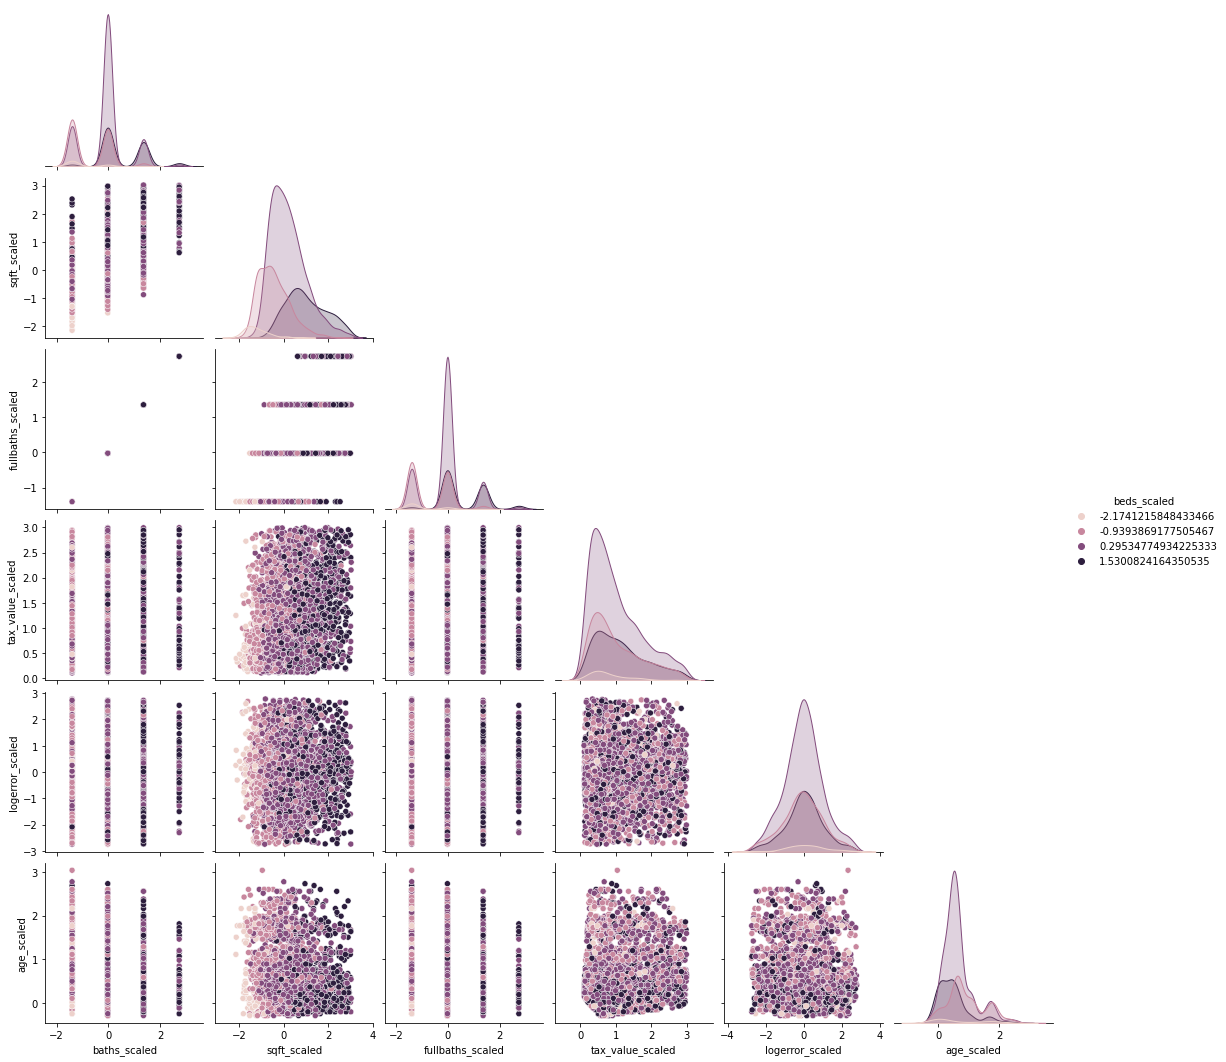

In [133]:
sns.pairplot(cluster_zero_df[['baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled', '4_clusters']], corner = True, hue = 'beds_scaled')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


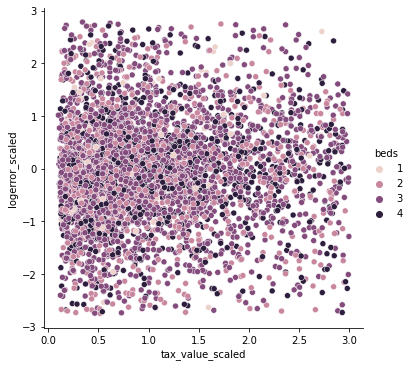

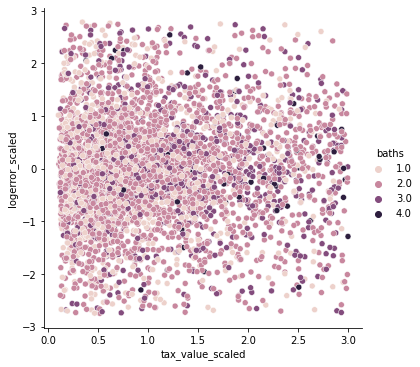

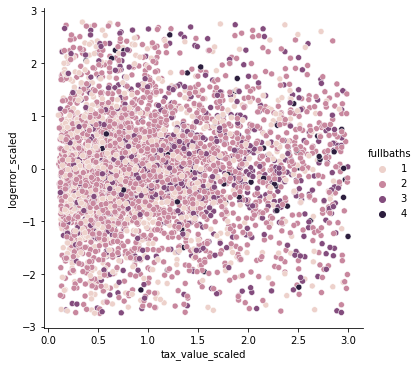

In [142]:
sns.relplot(cluster_zero_df.tax_value_scaled, cluster_zero_df.logerror_scaled, hue = cluster_zero_df.beds)
sns.relplot(cluster_zero_df.tax_value_scaled, cluster_zero_df.logerror_scaled, hue = cluster_zero_df.baths)
sns.relplot(cluster_zero_df.tax_value_scaled, cluster_zero_df.logerror_scaled, hue = cluster_zero_df.fullbaths)

>### What makes newer homes less expensive?

Looking only at at `cluster_1` blue: *newer, inexpensive* homes

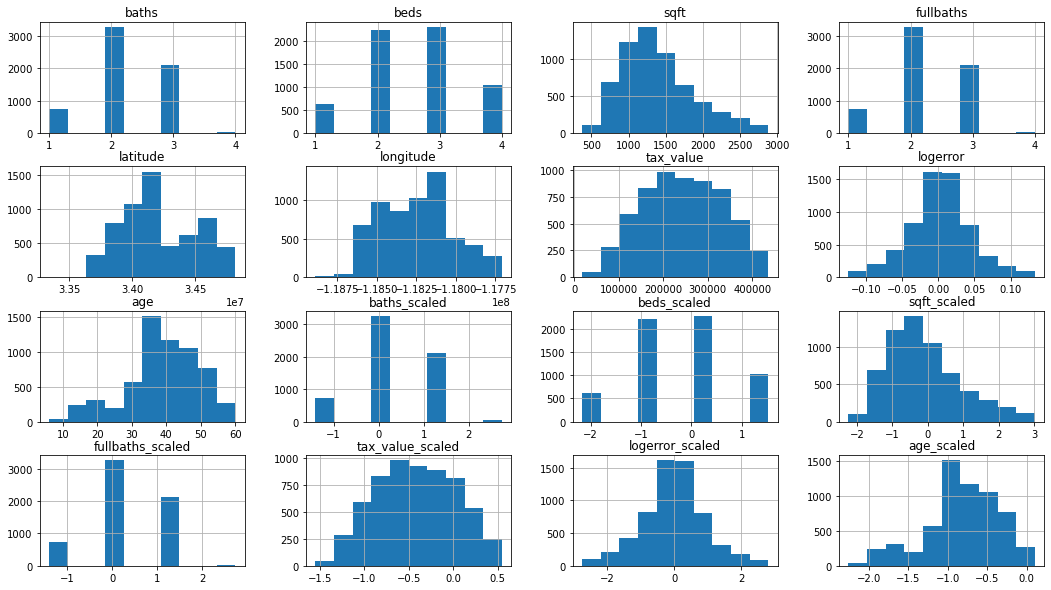

In [123]:
cluster_one_df = cluster_df_geo[cluster_df_geo['4_clusters'] == 'cluster_1']
cluster_one_df.drop(columns = ['2_clusters', '3_clusters', '5_clusters'], inplace = True)
cluster_one_df.hist(figsize = (18, 10));

In [ ]:
sns.pairplot(four_clusters_df, corner = True)

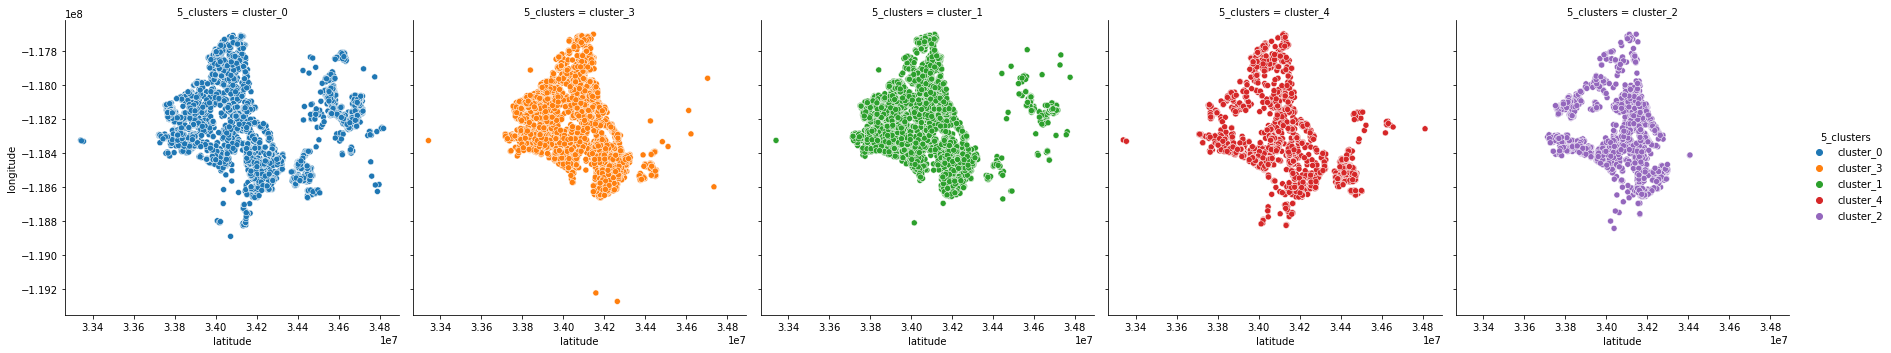

In [91]:
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '5_clusters', col = '5_clusters')

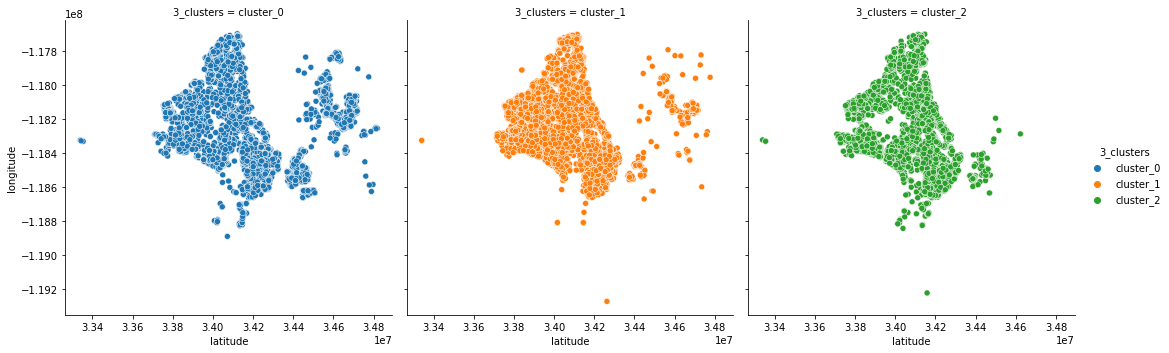

In [88]:
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '3_clusters', col = '3_clusters')

### Some interesting patterns when I look at k = 3
- cluster_0 mostly on the right half
- cluster_1 mostly in top left portion
- cluster_2 mostly in the bottom left portion

>Now to further explore this

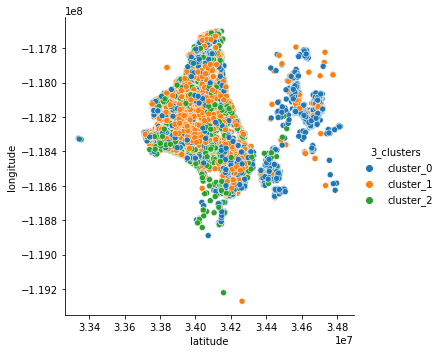

In [73]:
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '3_clusters')

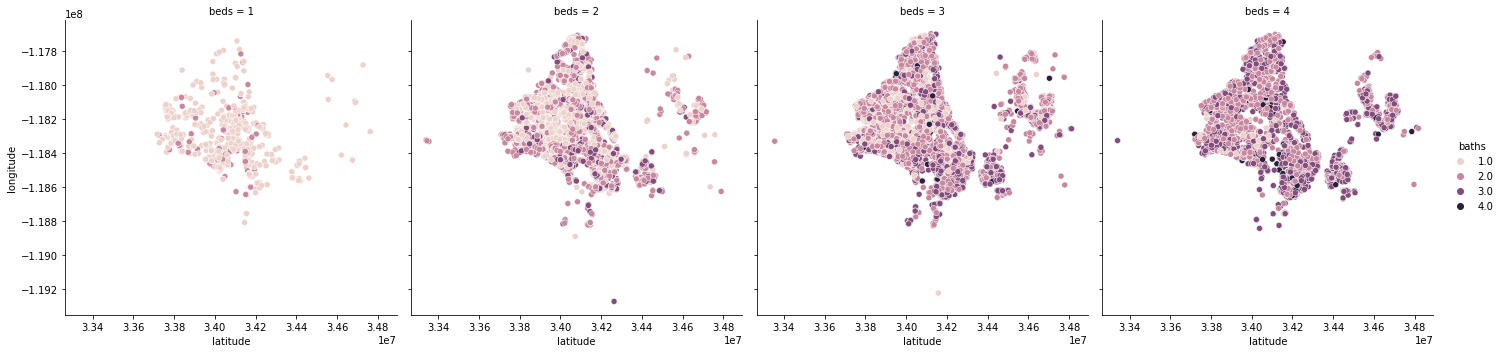

In [85]:
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = 'baths', col = 'beds')

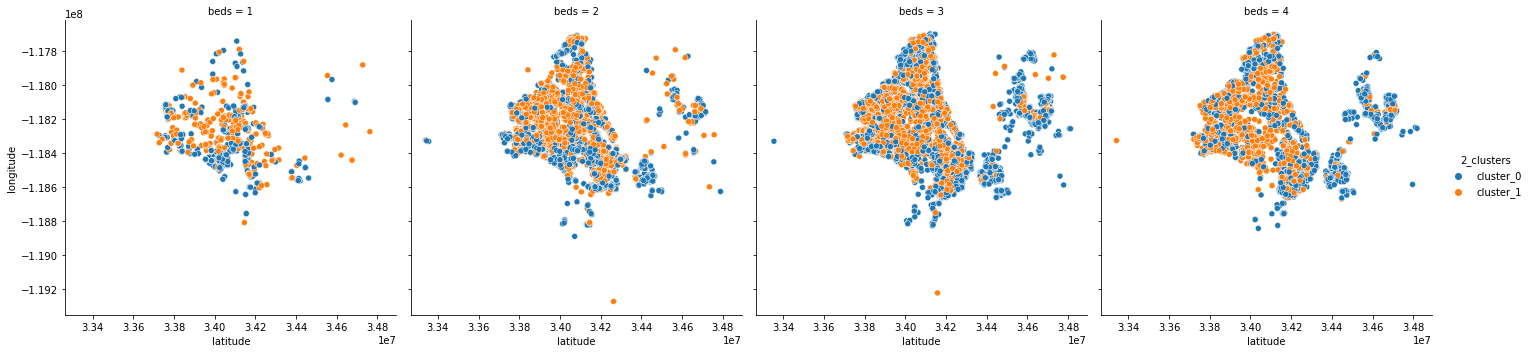

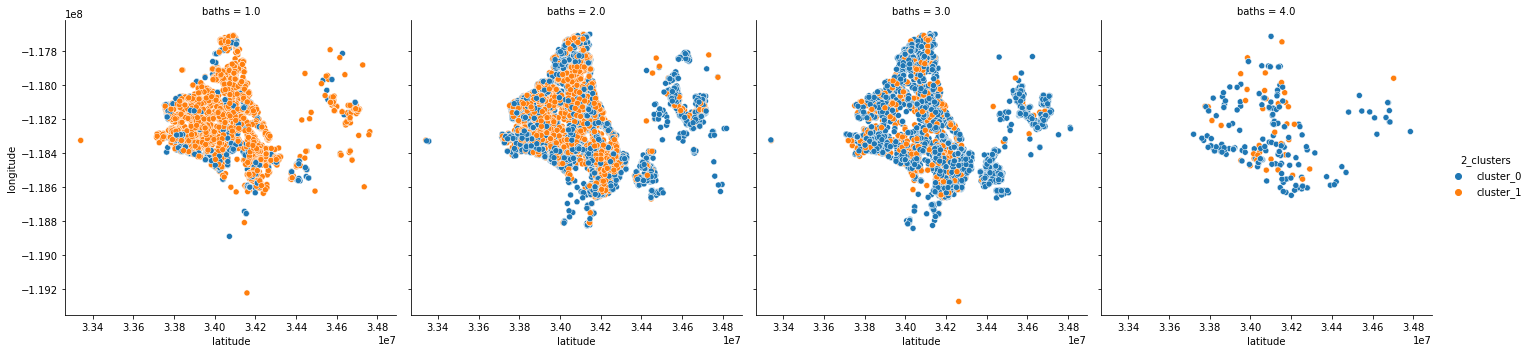

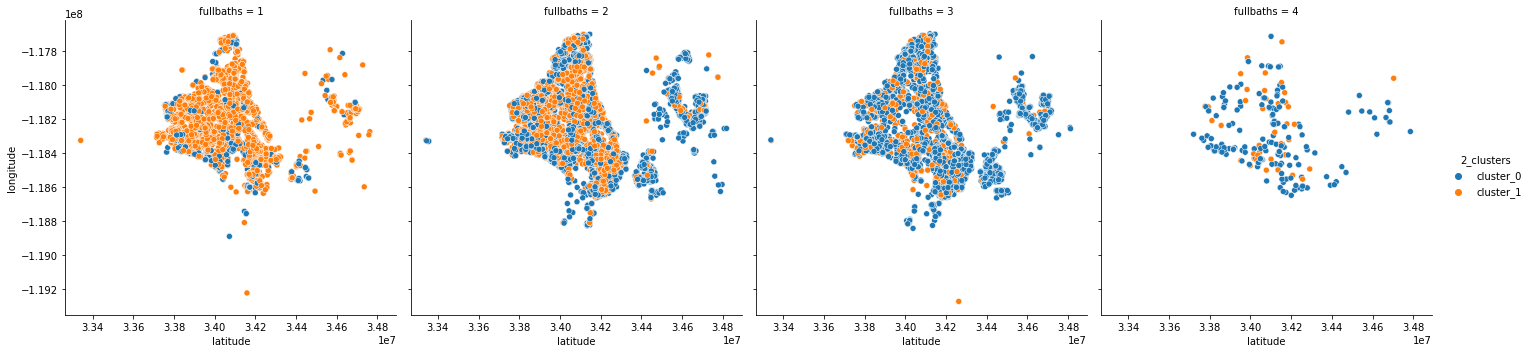

In [98]:
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '2_clusters', col = 'beds')

sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '2_clusters', col = 'baths')

sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '2_clusters', col = 'fullbaths')

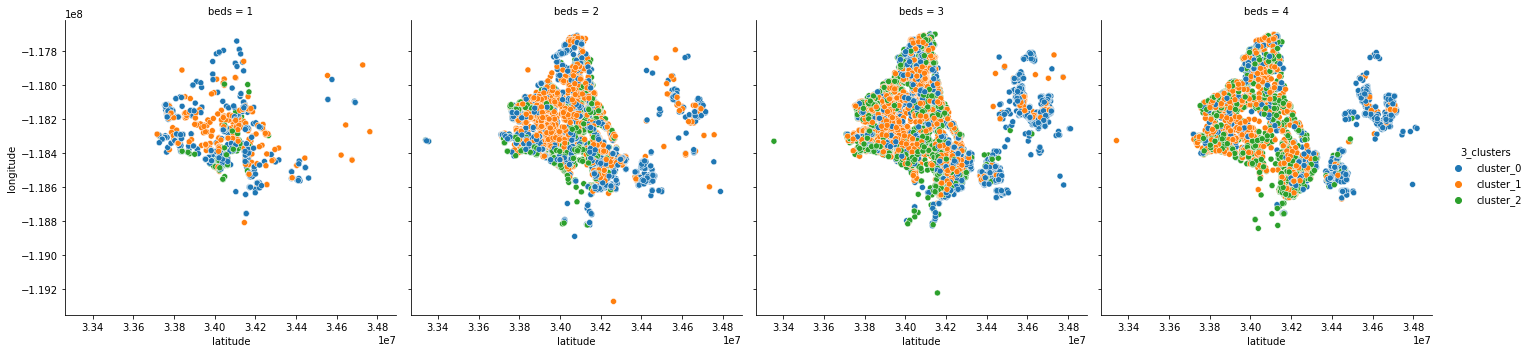

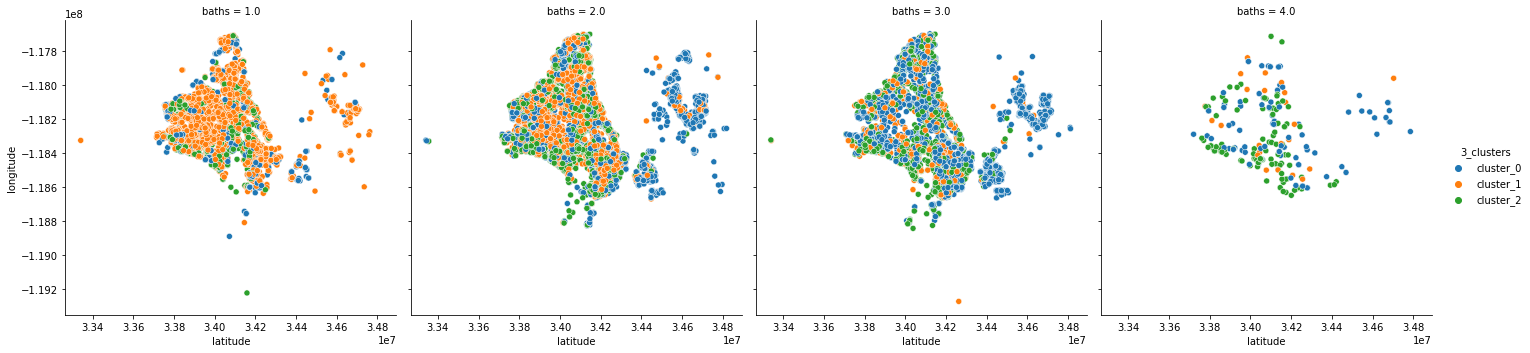

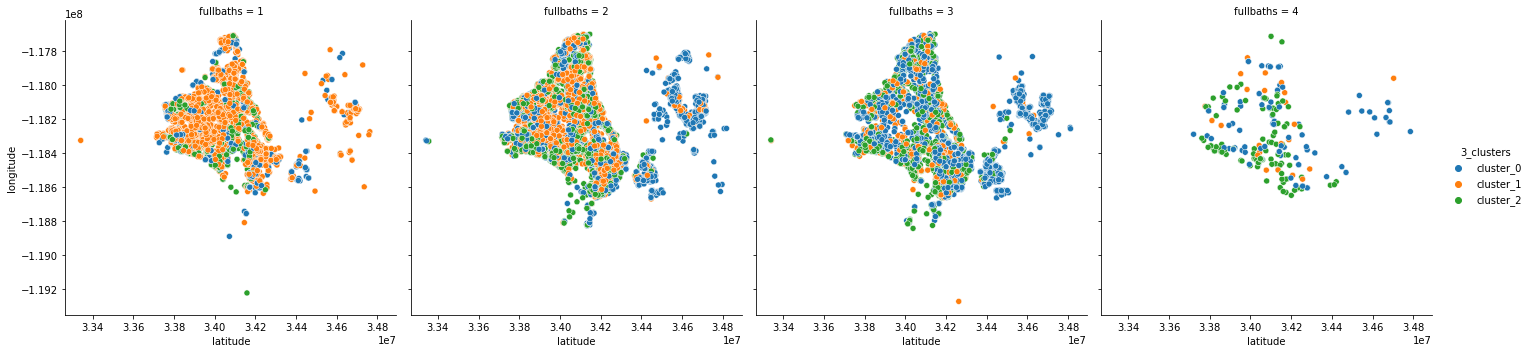

In [99]:
sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '3_clusters', col = 'beds')

sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '3_clusters', col = 'baths')

sns.relplot(data = cluster_df_geo, x = 'latitude', y = 'longitude', hue = '3_clusters', col = 'fullbaths')

In [95]:
cluster_df_geo.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age', 'baths_scaled', 'beds_scaled',
       'sqft_scaled', 'fullbaths_scaled', 'tax_value_scaled',
       'logerror_scaled', 'age_scaled', '2_clusters', '3_clusters',
       '4_clusters', '5_clusters'],
      dtype='object')

In [96]:
for col in cluster_df_geo.columns:
    if cluster_df_geo[col].nunique() < 20:
        print(col.upper())
        print(cluster_df_geo[col].value_counts())
        print()
        print()

BATHS
2.0    10209
1.0     4919
3.0     4833
4.0      223
Name: baths, dtype: int64


BEDS
3    9117
2    6284
4    3674
1    1109
Name: beds, dtype: int64


FULLBATHS
2    10209
1     4919
3     4833
4      223
Name: fullbaths, dtype: int64


BATHS_SCALED
-0.024568    10209
-1.402039     4919
 1.352902     4833
 2.730372      223
Name: baths_scaled, dtype: int64


BEDS_SCALED
 0.295348    9117
-0.939387    6284
 1.530082    3674
-2.174122    1109
Name: beds_scaled, dtype: int64


FULLBATHS_SCALED
-0.024568    10209
-1.402039     4919
 1.352902     4833
 2.730372      223
Name: fullbaths_scaled, dtype: int64


2_CLUSTERS
cluster_1    10195
cluster_0     9989
Name: 2_clusters, dtype: int64


3_CLUSTERS
cluster_1    8165
cluster_0    7268
cluster_2    4751
Name: 3_clusters, dtype: int64


4_CLUSTERS
cluster_3    6876
cluster_1    6160
cluster_0    4455
cluster_2    2693
Name: 4_clusters, dtype: int64


5_CLUSTERS
cluster_0    5748
cluster_1    5301
cluster_3    4561
cluster_4    2709
clu

# Using Sophia's Function to cluster, evaluate clusters, and plot again var_x

In [184]:
train, validate, test = wrangle_jones.split_data(df)

train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_jones.scale_data(train, validate, test, df)

/Users/stephanie/codeup-data-science/zillow-clustering-project/wrangle_jones.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scaled[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(test_scaled[cols_to_scale])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [144]:
train.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  
24277  20.0  
10231  66.0  
63485  58.0  
60254  50.0  
68284  36.0

In [145]:
train_scaled.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  baths_scaled  beds_scaled  sqft_scaled  fullbaths_scaled  \
24277  20.0     -0.024568    -0.939387    -1.419227         -0.024568   
10231  66.0     -0.024568     1.530082    -0.564908         -0.024568   
63485  58.0     -0.024568     0.295348    -0.696825         -0.024568   
60254  50.0     -0.024568     0.295348    -0.089589         -0.024568   
68284  36.0      1.352902    -0.939387    -0.807803          1.352902   

       tax_value_scaled  logerror_scaled  age_scaled  
24277          0.002470        -0.183790   -1.646064  
10231          0.132355        -0.310836    0.366355  
63485         -1.433744         0.126370    0.016369  
60254          0.477454        -0.850465   -0.333617  
68284         -0.950127        -0.863638   -0.946093

In [199]:
from sklearn.preprocessing import StandardScaler

def cluster_viz(cluster_vars, k, viz_x, viz_y):
    # define independent variables to cluster on
    cluster_vars_df = train[cluster_vars]
    
    # scale features before clustering
    scaler = StandardScaler().fit(cluster_vars_df)
    cluster_vars_df_scaled = pd.DataFrame(scaler.transform(cluster_vars_df), columns = cluster_vars_df.columns)
    
    # create kmeans object for clustering
    kmeans = KMeans(n_clusters = k, random_state = 123)
    
    # fit clustering object
    kmeans.fit(cluster_vars_df_scaled)
    
    # make cluster predictions
    kmeans.predict(cluster_vars_df_scaled)
    
    # create columns for predictions to add to train and scaled dfs
    cluster_vars_df['cluster'] = kmeans.predict(cluster_vars_df_scaled)
    cluster_vars_df_scaled['cluster'] = kmeans.predict(cluster_vars_df_scaled)
    
    # visualize clusters in plot of logerror and other independent variables
    sns.scatterplot(x = viz_x, y = viz_y, data = train, hue = cluster_vars_df.cluster, alpha=0.5)
    plt.title(f'{viz_x.upper()} Plotted Against {viz_y.upper()} | Clustered on {cluster_vars}')
    
    
    return cluster_vars_df, cluster_vars_df_scaled

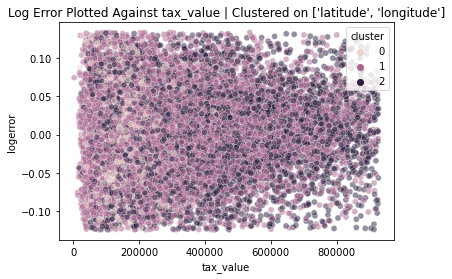

In [153]:
cluster_viz(['latitude', 'longitude'], 3, 'tax_value')

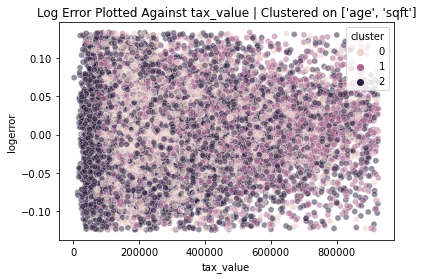

In [154]:
cluster_viz(['age', 'sqft'], 3, 'tax_value')

In [ ]:
cluster_viz(['sqft', 'age'], 3, 'tax_value')

In [157]:
from math import sqrt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [161]:
train.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  cluster  
24277  20.0        0  
10231  66.0        2  
63485  58.0        2  
60254  50.0        0  
68284  36.0        0

In [170]:
train_scaled.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  baths_scaled  beds_scaled  sqft_scaled  fullbaths_scaled  \
24277  20.0     -0.024568    -0.939387    -1.419227         -0.024568   
10231  66.0     -0.024568     1.530082    -0.564908         -0.024568   
63485  58.0     -0.024568     0.295348    -0.696825         -0.024568   
60254  50.0     -0.024568     0.295348    -0.089589         -0.024568   
68284  36.0      1.352902    -0.939387    -0.807803          1.352902   

       tax_value_scaled  logerror_scaled  age_scaled  
24277          0.002470        -0.183790   -1.646064  
10231          0.132355        -0.310836    0.366355  
63485         -1.433744         0.126370    0.016369  
60254          0.477454        -0.850465   -0.333617  
68284         -0.950127        -0.863638   -0.946093

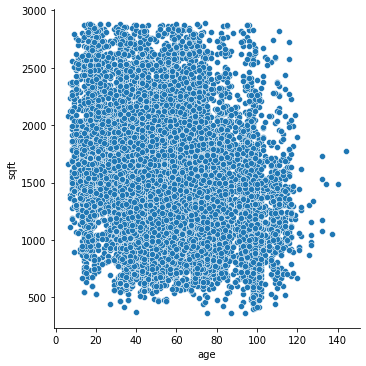

In [165]:
sns.relplot(data = train, x = 'age', y = 'sqft', hue = 't')

## using cluster viz function to get df's w/cluster predictions

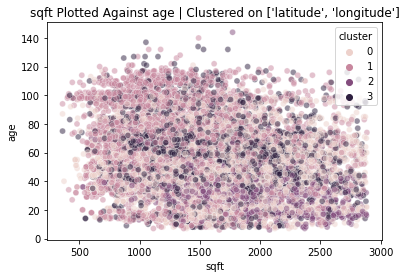

In [181]:
train, train_scaled = cluster_viz(['latitude', 'longitude'], 4, 'sqft', 'age')

In [204]:
train.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  
24277  20.0  
10231  66.0  
63485  58.0  
60254  50.0  
68284  36.0

In [205]:
train_scaled.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  baths_scaled  beds_scaled  sqft_scaled  fullbaths_scaled  \
24277  20.0     -0.024568    -0.939387    -1.419227         -0.024568   
10231  66.0     -0.024568     1.530082    -0.564908         -0.024568   
63485  58.0     -0.024568     0.295348    -0.696825         -0.024568   
60254  50.0     -0.024568     0.295348    -0.089589         -0.024568   
68284  36.0      1.352902    -0.939387    -0.807803          1.352902   

       tax_value_scaled  logerror_scaled  age_scaled  
24277          0.002470        -0.183790   -1.646064  
10231          0.132355        -0.310836    0.366355  
63485         -1.433744         0.126370    0.016369  
60254          0.477454        -0.850465   -0.333617  
68284         -0.950127        -0.863638   -0.946093

In [202]:
# df with cluster variables, unscaled
cluster_vars_df.head()

sqft   age  cluster
24277   763  20.0        0
10231  1171  66.0        1
63485  1108  58.0        1
60254  1398  50.0        0
68284  1055  36.0        0

In [232]:
# df with cluster variables, scaled

cluster_vars_df_scaled.head()

sqft       age  cluster
0 -1.419227 -1.646064        0
1 -0.564908  0.366355        1
2 -0.696825  0.016369        1
3 -0.089589 -0.333617        0
4 -0.807803 -0.946093        0

In [240]:
train_scaled['cluster'] = cluster_vars_df_scaled.cluster

In [249]:
train_scaled_index_reset = train_scaled.reset_index().drop(columns = ['index'])

In [251]:
train_scaled_index_reset['cluster']  = cluster_vars_df_scaled.cluster
train_scaled_index_reset

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
0        2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
1        2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
2        2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
3        2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
4        3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   
...      ...   ...   ...        ...       ...        ...        ...       ...   
20179    3.0     3  1846          3  33953761 -118333608   519000.0 -0.042564   
20180    3.0     2  1127          3  34415800 -118446000   196268.0 -0.036186   
20181    3.0     3  2523          3  34681158 -118207170   277386.0  0.088203   
20182    3.0     3  1861          3  34416897 -118515070   397978.0  0.002939   
20183    2.0     2  1143          2  33742300 -118316000   234191.0 -0.032567   

        age  baths_scaled  beds_scaled  sqft_scaled  fullbaths_scaled  \
0      20.0     -0.024568    -0.939387    -1.419227         -0.024568   
1      66.0     -0.024568     1.530082    -0.564908         -0.024568   
2      58.0     -0.024568     0.295348    -0.696825         -0.024568   
3      50.0     -0.024568     0.295348    -0.089589         -0.024568   
4      36.0      1.352902    -0.939387    -0.807803          1.352902   
...     ...           ...          ...          ...               ...   
20179  17.0      1.352902     0.295348     0.848486          1.352902   
20180  38.0      1.352902    -0.939387    -0.657041          1.352902   
20181  17.0      1.352902     0.295348     2.266069          1.352902   
20182   8.0      1.352902     0.295348     0.879895          1.352902   
20183  51.0     -0.024568    -0.939387    -0.623538         -0.024568   

       tax_value_scaled  logerror_scaled  age_scaled  cluster  
0              0.002470        -0.183790   -1.646064        0  
1              0.132355        -0.310836    0.366355        1  
2             -1.433744         0.126370    0.016369        1  
3              0.477454        -0.850465   -0.333617        0  
4             -0.950127        -0.863638   -0.946093        0  
...                 ...              ...         ...      ...  
20179          0.961621        -0.984408   -1.777309        3  
20180         -0.650612        -0.847391   -0.858596        0  
20181         -0.245381         1.824595   -1.777309        3  
20182          0.357046        -0.006950   -2.171043        3  
20183         -0.461165        -0.769654   -0.289869        0  

[20184 rows x 17 columns]

In [217]:
len(train_scaled.append([train_scaled, cluster_vars_df_scaled]).columns)

17

In [215]:
train_scaled.append([train_scaled, cluster_vars_df_scaled]).columns.nunique() 

17

In [239]:
cluster_vars_df.cluster

24277    0
10231    1
63485    1
60254    0
68284    0
        ..
70959    3
48908    0
23095    3
35555    3
73657    0
Name: cluster, Length: 20184, dtype: int32

In [234]:
train_scaled.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
24277    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
10231    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
63485    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
60254    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
68284    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

        age  baths_scaled  beds_scaled  sqft_scaled  fullbaths_scaled  \
24277  20.0     -0.024568    -0.939387    -1.419227         -0.024568   
10231  66.0     -0.024568     1.530082    -0.564908         -0.024568   
63485  58.0     -0.024568     0.295348    -0.696825         -0.024568   
60254  50.0     -0.024568     0.295348    -0.089589         -0.024568   
68284  36.0      1.352902    -0.939387    -0.807803          1.352902   

       tax_value_scaled  logerror_scaled  age_scaled  
24277          0.002470        -0.183790   -1.646064  
10231          0.132355        -0.310836    0.366355  
63485         -1.433744         0.126370    0.016369  
60254          0.477454        -0.850465   -0.333617  
68284         -0.950127        -0.863638   -0.946093

<ipython-input-199-e9e1a8cc027b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_vars_df['cluster'] = kmeans.predict(cluster_vars_df_scaled)


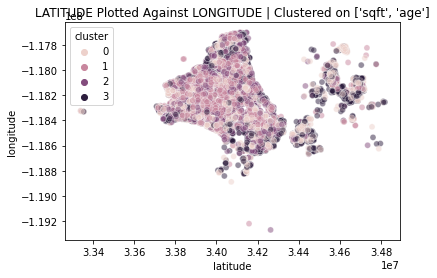

In [200]:
cluster_vars_df, cluster_vars_df_scaled = cluster_viz(['sqft', 'age'], 4, 'latitude', 'longitude')

## Encoding cluster column

In [252]:
all_the_data = train_scaled_index_reset

In [253]:
all_the_data.head()

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
0    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
1    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
2    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   
3    2.0     3  1398          2  33888595 -118062849   422081.0 -0.036329   
4    3.0     2  1055          3  34235900 -118463000   136312.0 -0.036942   

    age  baths_scaled  beds_scaled  sqft_scaled  fullbaths_scaled  \
0  20.0     -0.024568    -0.939387    -1.419227         -0.024568   
1  66.0     -0.024568     1.530082    -0.564908         -0.024568   
2  58.0     -0.024568     0.295348    -0.696825         -0.024568   
3  50.0     -0.024568     0.295348    -0.089589         -0.024568   
4  36.0      1.352902    -0.939387    -0.807803          1.352902   

   tax_value_scaled  logerror_scaled  age_scaled  cluster  
0          0.002470        -0.183790   -1.646064        0  
1          0.132355        -0.310836    0.366355        1  
2         -1.433744         0.126370    0.016369        1  
3          0.477454        -0.850465   -0.333617        0  
4         -0.950127        -0.863638   -0.946093        0

In [255]:
all_the_data.cluster

0        0
1        1
2        1
3        0
4        0
        ..
20179    3
20180    0
20181    3
20182    3
20183    0
Name: cluster, Length: 20184, dtype: int32

In [258]:
dummy_df = pd.get_dummies(all_the_data.cluster)

In [262]:
encoded = pd.concat([all_the_data, dummy_df], axis = 1)

In [277]:
encoded.head(3)

baths  beds  sqft  fullbaths  latitude  longitude  tax_value  logerror  \
0    2.0     2   763          2  33823600 -118342000   327000.0 -0.005293   
1    2.0     4  1171          2  34280592 -118425818   353000.0 -0.011207   
2    2.0     3  1108          2  34097291 -117999167    39503.0  0.009146   

    age  baths_scaled  ...  sqft_scaled  fullbaths_scaled  tax_value_scaled  \
0  20.0     -0.024568  ...    -1.419227         -0.024568          0.002470   
1  66.0     -0.024568  ...    -0.564908         -0.024568          0.132355   
2  58.0     -0.024568  ...    -0.696825         -0.024568         -1.433744   

   logerror_scaled  age_scaled  cluster  cluster_0  cluster_1  cluster_2  \
0        -0.183790   -1.646064        0          1          0          0   
1        -0.310836    0.366355        1          0          1          0   
2         0.126370    0.016369        1          0          1          0   

   cluster_3  
0          0  
1          0  
2          0  

[3 rows x 21 columns]

In [275]:
encoded = encoded.rename(columns = {0: 'cluster_0', 1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3'})

In [331]:
X_train = encoded[['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'tax_value_scaled', 'beds_scaled']]
y_train = pd.DataFrame(train.logerror).reset_index(drop = 'index')

# X_validate = validate_scaled[['0', '1', '2', '3', 'tax_value_scaled', 'beds_scaled']]
# y_validate = validate.logerror

# X_test = test_scaled[['0', '1', '2', '3', 'tax_value_scaled', 'beds_scaled']]
# y_test = test.logerror

In [291]:
X_train.head()

cluster_0  cluster_1  cluster_2  cluster_3  tax_value_scaled  beds_scaled
0          1          0          0          0          0.002470    -0.939387
1          0          1          0          0          0.132355     1.530082
2          0          1          0          0         -1.433744     0.295348
3          1          0          0          0          0.477454     0.295348
4          1          0          0          0         -0.950127    -0.939387

In [332]:
y_train.head()

logerror
0 -0.005293
1 -0.011207
2  0.009146
3 -0.036329
4 -0.036942

In [333]:
y_train.logerror.median()

0.003948276387625

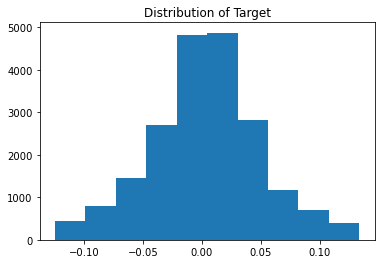

In [305]:
plt.hist(y_train.logerror)
plt.title('Distribution of Target');

### Baseline predictions

In [334]:
# median and mean logerror
median = y_train.logerror.median()

In [335]:
median

0.003948276387625

In [336]:
# creating a column on y_train for the baseline (median) logerror prediction
y_train['baseline_pred'] = median

In [337]:
y_train

logerror  baseline_pred
0     -0.005293       0.003948
1     -0.011207       0.003948
2      0.009146       0.003948
3     -0.036329       0.003948
4     -0.036942       0.003948
...         ...            ...
20179 -0.042564       0.003948
20180 -0.036186       0.003948
20181  0.088203       0.003948
20182  0.002939       0.003948
20183 -0.032567       0.003948

[20184 rows x 2 columns]

In [338]:
y_train.isna().sum()

logerror         0
baseline_pred    0
dtype: int64

In [344]:
# RMSE for baseline (median) prediction
RMSE_train_baseline = mean_squared_error(y_train.logerror, y_train.baseline_pred)
print(f'In Sample Baseline RMSE: {round(RMSE_train_baseline, 6)}')

In Sample Baseline RMSE: 0.002168


In [296]:
def model1_pred():
    '''
    This function fits the train and validate data to Model 1 | Linear Regression OLS Model
    and then calculates the RMSE for each. 
    '''
    
    # create the model object
    lm = LinearRegression(normalize=True)
    
    # fit the model to our training data. We must specify the column in y_train, because y_train is a df
    lm.fit(X_train, y_train)
    
    # predict train and validate
    y_train['model1_pred'] = lm.predict(X_train)
#     y_validate['model1_pred'] = lm.predict(X_validate)
    
    # Model 1 RMSE for train and validate
    model1_rsme_train = sqrt(mean_squared_error(y_train, y_train.model1_pred))
#     model1_rsme_validate = sqrt(mean_squared_error(y_validate, y_validate.model1_pred))
    
    return model1_rsme_train#, model1_rsme_validate

In [297]:
model1_pred()

ValueError: y_true and y_pred have different number of output (2!=1)

In [279]:
def model2_pred():
    '''
    This function fits the train to Model 2 | LassoLars, makes predictions on the train 
    and validate data, and then calculates the RMSE for each. 
    '''
    
    # create the model object
    lars = LassoLars(alpha=1.0)

    # fit the model to our training data
    lars.fit(X_train, y_train.tax_value)

    # predict train and validate
    y_train['model2_pred'] = lars.predict(X_train)
#     y_validate['model2_pred'] = lars.predict(X_validate)

    # calculate model 2 rsme for train and validate
    model2_rsme_train = sqrt(mean_squared_error(y_train.tax_value, y_train.model2_pred))
#     model2_rsme_validate = sqrt(mean_squared_error(y_validate.tax_value, y_validate.model2_pred))
    
    return model2_rsme_train#, model2_rsme_validate

In [280]:
def model3_pred():
    '''
    This function fits the train data to Model 3 | TweedieRegressor (GLM), makes predictions on the
    train and validate data, and then calculates the RMSE for each. 
    '''
    
    # create the model object
    glm = TweedieRegressor(power=1, alpha=0)

    # fit the model to our training data
    glm.fit(X_train, y_train.tax_value)

    # predict train and validate
    y_train['model3_pred'] = glm.predict(X_train)
#     y_validate['model3_pred'] = glm.predict(X_validate)

    # calculate model 2 rsme for train and validate
    model3_rsme_train = sqrt(mean_squared_error(y_train.tax_value, y_train.model3_pred))
#     model3_rsme_validate = sqrt(mean_squared_error(y_validate.tax_value, y_validate.model3_pred))

    return model3_rsme_train#, model3_rsme_validate